In [1]:
!git clone https://github.com/krishnaik06/simple-Linear-Regression

Cloning into 'simple-Linear-Regression'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.


In [2]:
%cd /content/simple-Linear-Regression

/content/simple-Linear-Regression


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


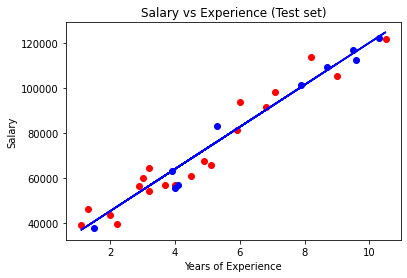

In [17]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

print(X)
print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')


# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

1 1
[8389.36614179] [28276.19736449]


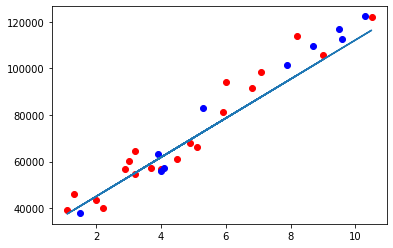

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# print(X)
# print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'blue')

w1 = 1
w0 = 1
lr = 0.01

def forward(x):
	return w1 * x + w0

def loss_fn(y_pred, y):
  # return (y_pred - y) * (y_pred - y)
	return np.power(y_pred - y, 2) 

def update(x, y, y_pred):
	global w1, w0
	w1 = w1 - lr * 2 * x * (y_pred - y)
	w0 = w0 - lr * 2 * 1 * (y_pred - y)

print(w1, w0)

for epoch in range(100):
	for x_val, y_val in zip(X_train, y_train):
		y_pred = forward(x_val)   # [2] Model build
		loss = loss_fn(y_pred, y_val)  # [3] loss function
		update(x_val, y_val, y_pred)    # [4] Learning (gradient descent)
		# print(loss)


print(w1, w0) # find w, b

predict = [(w1 * x + w0) for x in X_train]


plt.plot(X_train, predict)
plt.show()